In [1]:
try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
# tensorflow와 tf.keras를 임포트합니다.
import tensorflow as tf
from tensorflow import keras

In [0]:
# 헬퍼(helper) 라이브러리를 임포트합니다.
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 버전 확인
print(tf.__version__)

2.1.0


## 패션 MNIST 데이터셋 임포트하기

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

In [0]:
train_images.shape

In [10]:
len(train_labels)

60000

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

## 데이터 전처리

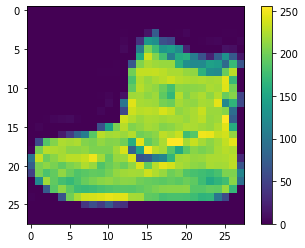

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

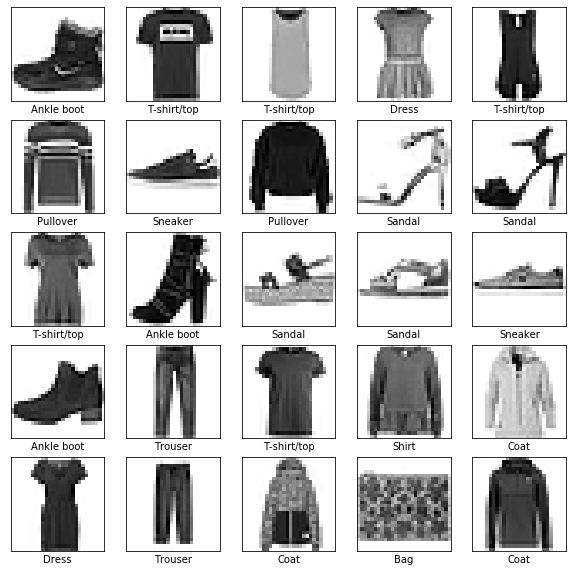

In [17]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성

### 층 설정

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

### 모델 컴파일

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 모델 훈련

In [20]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.5023 - accuracy: 0.8235
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3751 - accuracy: 0.8658
Epoch 3/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3355 - accuracy: 0.8780
Epoch 4/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3136 - accuracy: 0.8846
Epoch 5/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2949 - accuracy: 0.8909


In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n테스트 정확도: ', test_acc)

10000/10000 - 1s - loss: 0.3424 - accuracy: 0.8774

테스트 정확도:  0.8774


### 예측 만들기

In [0]:
predictions = model.predict(test_images)

In [23]:
predictions[0]

array([1.4558382e-04, 8.7932983e-07, 8.4173837e-07, 4.9206590e-09,
       6.8089616e-06, 3.8290210e-02, 9.0055219e-06, 1.6701823e-01,
       3.5098554e-05, 7.9449326e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])

9

In [25]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100 * np.max(predictions_array),
                                       class_names[true_label]),
             color=color)

In [0]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

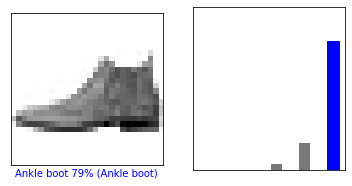

In [28]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

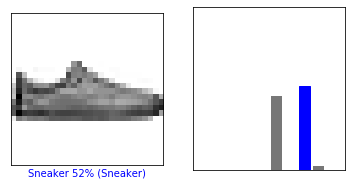

In [29]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


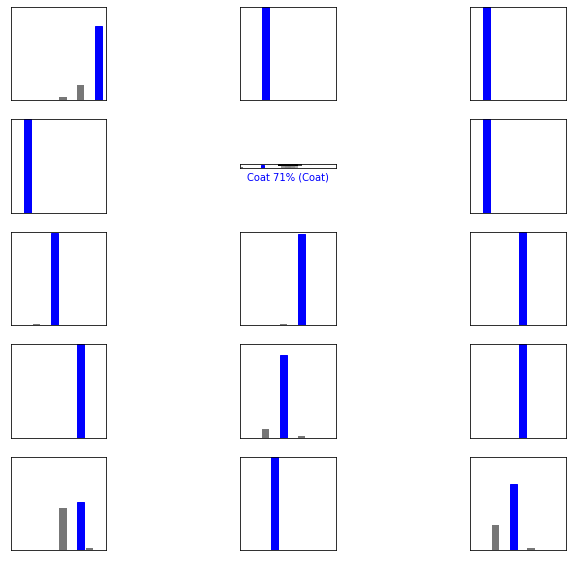

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*num_rows)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [31]:
img = test_images

print(img.shape)

(10000, 28, 28)


In [32]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 10000, 28, 28)


In [33]:
predictions_single = model.predict(img)

print(predictions_single)

ValueError: ignored

In [34]:
plot_value_array(0, predictions_single, test_labels)

NameError: ignored